In [1]:
#Import Libaraies
from fastai.vision.all import *
import torch 
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\mindf\anaconda3\envs\ml_mastery_replicates\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Load Dataset. We will be testing the teacher and student models, first and foremost, on the Imagenet Dataset
#This is as one of the key criticisms of the original paper was that only CIFAR-100 was used to validate the given findings
#As actually training a model on the full ImageNet dataset would require more compute, processing pwoer, and time than currently available, use 
#FastAI's Imagenette and Imagewoof instead - combined into one, the Imagewang dataset.

#Use the 160 px version to save training time
Imagewang_path = untar_data(URLs.IMAGEWANG_160)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


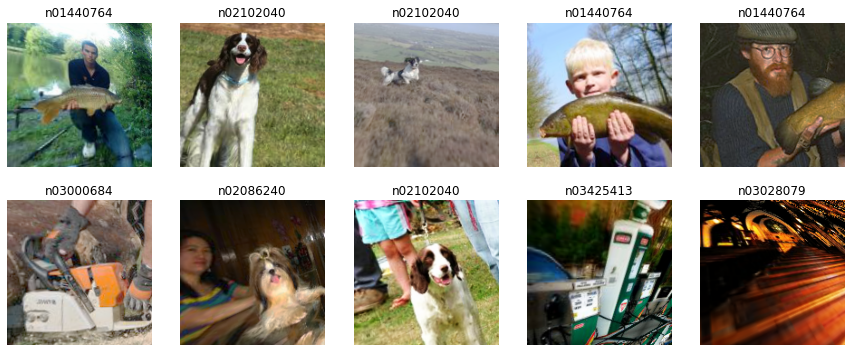

In [3]:
#Create Training Datablock for the teacher model
teacher_train_datablock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                                       get_items = get_image_files,
                                       get_y = parent_label,
                                       splitter = RandomSplitter(valid_pct = 0.25, seed = 25),
                                       batch_tfms = aug_transforms(mult = 2.),
                                       item_tfms = Resize(160))
#Create a dataloader for the teacher model
batch_size = 64
teacher_train_dataloader = teacher_train_datablock.dataloaders(source = Imagewang_path/"train", batch_size = batch_size, shuffle = True)
#Print sample batch of 10 samples
teacher_train_dataloader.train.show_batch(max_n = 10, nrows = 2)

In [14]:
#Create a Learner Object for the teacher. This will, initially, be a DenseNet - the goal is to teach a ResNet with the same parameters and attain the same accuracy
#T - teacher, S - Student
#Use pretrained DenseNet from Pytorch (Densenet 121)
DenseNet121_Model_T = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True)
DenseNet121_Learner_T = Learner(teacher_train_dataloader, DenseNet121_Model_T)
#Find optimal learning rate
DenseNet121_optimalLR_T = DenseNet121_Learner_T.lr_find()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to C:\Users\mindf/.cache\torch\hub\v0.10.0.zip
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to C:\Users\mindf/.cache\torch\hub\checkpoints\densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:02<00:00, 14.0MB/s]


In [ ]:
print(DenseNet121_optimlLR_T)

In [ ]:
#Create student model training loop
from CWTM_Distillation_Loss import CWTM_DistillationLoss
from DKPP_Distillation_Loss import DKPP_DistillationLoss


def train_student(model, epochs, loss_function, n_samples, dataloader):
    for epoch in range(epochs):
        for sample in range(n_samples):
            